<a href="https://colab.research.google.com/github/stepheodhiambo2000/Odhiambo_Machine_Learning/blob/main/PredictionThreshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()
from sklearn.metrics import accuracy_score, roc_curve, auc

In [3]:
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")
dat.head(4)

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0


In [4]:
dat.describe()

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.684566,0.715192,-0.116641,0.512581,0.289319,0.163719,0.190406,0.079886,0.107779,0.074896,0.146084,0.022512,0.500000
std,0.646158,0.740843,0.759473,0.768940,0.267643,0.379294,0.339825,0.258335,0.142462,0.238517,0.170646,0.148741,0.502519
min,0.658985,-1.183008,-1.780875,-0.817861,-0.360071,-0.594739,-0.698099,-0.369600,-0.265226,-0.461147,-0.310560,-0.259914,0.000000
25%,1.238303,0.198474,-0.743091,-0.134814,0.126530,-0.100461,-0.007374,-0.122029,0.008219,-0.088685,0.051139,-0.101094,0.000000
50%,1.508657,0.701069,-0.158927,0.513533,0.286760,0.088629,0.197959,0.023022,0.106527,0.048998,0.152609,-0.002197,0.500000
75%,1.911765,1.323786,0.504736,0.898414,0.440356,0.413904,0.406277,0.273315,0.165301,0.238148,0.216333,0.113569,1.000000
max,4.165294,3.026890,1.530142,2.852605,1.199535,1.358913,0.949612,0.890315,0.617001,0.694208,0.639711,0.362473,1.000000


In [5]:
display(dat.dtypes.value_counts())

float64    12
int64       1
dtype: int64

In [8]:
dat.dtypes=='object'

FLAIR           False
PD              False
T1              False
T2              False
FLAIR_10        False
PD_10           False
T1_10           False
T2_10           False
FLAIR_20        False
PD_20           False
T1_20           False
T2_20           False
GOLD_Lesions    False
dtype: bool

In [11]:
len(dat)

100

In [4]:
dat.head()

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0
4,1.580589,1.730152,-0.860949,1.245609,0.617957,0.866352,-0.099919,0.384261,0.391133,0.608826,0.071648,0.340601,0


GOLD_Lesions
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: FLAIR, dtype: object

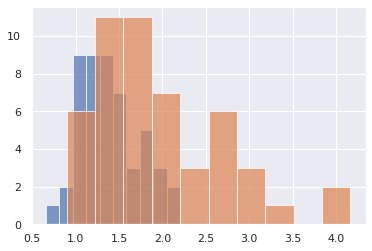

In [5]:
dat.groupby('GOLD_Lesions').FLAIR.hist(alpha= .7)

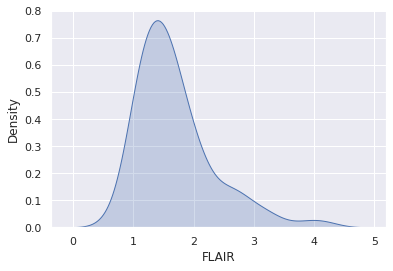

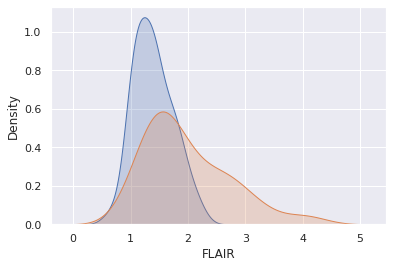

In [6]:
x0 = dat.FLAIR[dat.GOLD_Lesions == 0]
x1 = dat.FLAIR[dat.GOLD_Lesions == 1]
x2 = dat.FLAIR
sns.kdeplot(x2, shade = True, label = 'Marginal')
plt.show()
sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 2')
plt.show()

In [7]:
x = dat.FLAIR
y = dat.GOLD_Lesions
n = len(x)
trainFraction = .75

## Build a training and testing set
## Prob of being in the train set is trainFraction
sample = np.random.uniform(size = n) < trainFraction

## Get the training and testing sets
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]

In [10]:
## Let's test it out on the test set
testPredictions = (xtest > threshold)

## The test set accuracy
testAccuracy = np.mean(testPredictions == ytest)

## Let's see how it specifically does on the
## set of instances where ytest == 0 and ytest == 1
## The % it gets correct on ytest == 0 is called
## the specificity and the percent correct when 
## ytest == 1 is called the sensitivity.
sub0 = ytest == 0
sub1 = ytest == 1

testSpec = np.mean(ytest[sub0] == testPredictions[sub0])
testSens = np.mean(ytest[sub1] == testPredictions[sub1])

pd.DataFrame({
 'Threshold': threshold,
 'Accuracy': testAccuracy, 
 'Specificity': testSpec, 
 'Sensitivity': testSens}, index = [0])

,Threshold,Accuracy,Specificity,Sensitivity
0,1.419322,0.69697,0.5625,0.823529


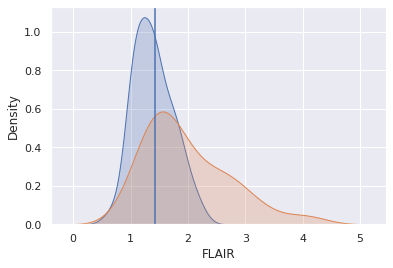

In [11]:
sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
plt.axvline(x=threshold)
            
plt.show()

In [12]:
fpr, tpr, thresholds = roc_curve(ytest, xtest)
roc_auc = auc(fpr, tpr)

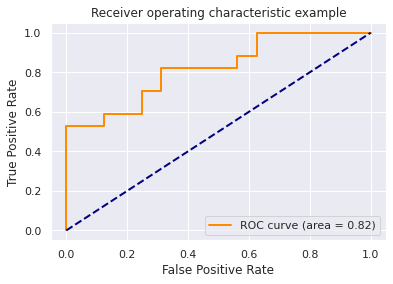

In [13]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()